# 🚀 YOLOv5 Model Eğitimi - Ekstra Puan İçin

**Öğrenci:** Eren Ali Koca  
**Öğrenci No:** 2212721021  
**Ders:** BLG-407 Makine Öğrenmesi

---

Bu notebook, YOLOv5 modelini eğitmek ve YOLOv8 ile karşılaştırmak için hazırlanmıştır.



---

## 1️⃣ GPU Kontrolü

**Ne Yapıyor:** GPU'nun aktif olup olmadığını kontrol eder. Tesla T4 veya benzeri bir GPU görmelisiniz.

**Beklenen Çıktı:** GPU bilgileri (Tesla T4, 15GB RAM vb.)

In [1]:
# GPU durumunu kontrol et
# Eğer GPU görünmüyorsa: Runtime → Change runtime type → GPU seçin
!nvidia-smi

Wed Nov 26 10:08:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

---

## 2️⃣ Google Drive Bağlantısı

**Ne Yapıyor:** Google Drive'ınızı Colab'a bağlar. Veri setinize erişmek için gerekli.

**Yapmanız Gereken:** Çıkan pencerede Google hesabınızı seçin ve "İzin Ver" butonuna tıklayın.

**Beklenen Çıktı:** "Mounted at /content/drive" mesajı

In [2]:
# Google Drive'ı bağla
from google.colab import drive
drive.mount('/content/drive')

# Bağlantı başarılı mı kontrol et
import os
if os.path.exists('/content/drive/MyDrive'):
    print("✅ Google Drive başarıyla bağlandı!")
else:
    print("❌ Google Drive bağlanamadı! Lütfen tekrar deneyin.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive başarıyla bağlandı!


---

## 3️⃣ YOLOv5 Repository'sini Klonlama

**Ne Yapıyor:** YOLOv5'in resmi GitHub repository'sini indirir.

**Beklenen Çıktı:** "Cloning into 'yolov5'..." mesajı ve dosya listesi

In [3]:
# YOLOv5 repository'sini klonla
# Eğer zaten varsa hata verebilir, bu normal
!git clone https://github.com/ultralytics/yolov5

# YOLOv5 klasörüne geç
%cd yolov5

# Dosyaları listele
!ls -la

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
total 480
drwxr-xr-x 13 root root  4096 Nov 26 10:04 .
drwxr-xr-x  1 root root  4096 Nov 26 10:00 ..
-rw-r--r--  1 root root 14130 Nov 26 10:00 benchmarks.py
-rw-r--r--  1 root root   393 Nov 26 10:00 CITATION.cff
drwxr-xr-x  2 root root  4096 Nov 26 10:00 classify
-rw-r--r--  1 root root  5419 Nov 26 10:00 CONTRIBUTING.md
drwxr-xr-x  5 root root  4096 Nov 26 10:00 data
-rw-------  1 root root   108 Nov 26 10:07 data.yaml
-rw-r--r--  1 root root 23760 Nov 26 10:00 detect.py
-rw-r--r--  1 root root  3701 Nov 26 10:00 .dockerignore
-rw-r--r--  1 root root 68529 Nov 26 10:00 export.py
drwxr-xr-x  8 root root  4096 Nov 26 10:02 .git
-rw-r--r--  1 root root    75 Nov 26 10:00 .gitattributes
drwxr-xr-x  4 root root  4096 Nov 26 10:00 .github
-rwxr-xr-x  1 root root  4010 Nov 26 10:00 .gitignore
-rw-r--r--  1 root root 24051 Nov 26 10:00 hubconf.py
-rw-r--r--  1 root root 34523 Nov 26 10:00 LICENSE


---

## 4️⃣ Gerekli Kütüphaneleri Kurma

**Ne Yapıyor:** YOLOv5'in çalışması için gerekli Python kütüphanelerini yükler.

**Süre:** ~2-3 dakika

**Beklenen Çıktı:** "Successfully installed..." mesajları

In [4]:
# YOLOv5 için gerekli kütüphaneleri yükle
# requirements.txt dosyasındaki tüm paketler yüklenecek
!pip install -r requirements.txt

# Kurulum kontrolü
import torch
print(f"\n✅ PyTorch versiyonu: {torch.__version__}")
print(f"✅ CUDA kullanılabilir mi: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✅ GPU: {torch.cuda.get_device_name(0)}")


✅ PyTorch versiyonu: 2.9.0+cu126
✅ CUDA kullanılabilir mi: True
✅ GPU: Tesla T4


---

## 5️⃣ Veri Setini Kopyalama

**Ne Yapıyor:** Google Drive'daki veri setinizi Colab ortamına kopyalar.

**⚠️ ÖNEMLİ:** Google Drive'ınızda `Uyg2 2` klasörü olmalı!

**Beklenen Çıktı:** Kopyalanan dosya sayısı

In [5]:
# Veri setini Colab ortamına kopyala
# Not: Google Drive'dan okuma yavaş olduğu için kopyalıyoruz

import shutil
import os

# Kaynak ve hedef yollar
source_dataset = '/content/drive/MyDrive/Uyg2 2/yolo_dataset'
source_yaml = '/content/drive/MyDrive/Uyg2 2/data.yaml'

# Veri seti var mı kontrol et
if os.path.exists(source_dataset):
    print("📂 Veri seti bulundu, kopyalanıyor...")

    # Veri setini kopyala
    !cp -r "{source_dataset}" .

    # data.yaml dosyasını kopyala ve düzenle
    !cp "{source_yaml}" .

    # data.yaml'daki path'i güncelle
    with open('data.yaml', 'r') as f:
        content = f.read()

    # Path'i Colab ortamına göre düzenle
    content = content.replace('path: /content/drive/MyDrive/Uyg2 2/yolo_dataset',
                            'path: /content/yolov5/yolo_dataset')

    with open('data.yaml', 'w') as f:
        f.write(content)

    # Kontrol
    train_count = len(os.listdir('yolo_dataset/train/images'))
    val_count = len(os.listdir('yolo_dataset/val/images'))

    print(f"\n✅ Veri seti kopyalandı!")
    print(f"   📊 Train görselleri: {train_count}")
    print(f"   📊 Val görselleri: {val_count}")
    print(f"   📊 Toplam: {train_count + val_count}")

    # data.yaml içeriğini göster
    print("\n📄 data.yaml içeriği:")
    !cat data.yaml

else:
    print("❌ HATA: Veri seti bulunamadı!")
    print(f"   Aranan konum: {source_dataset}")
    print("   Lütfen Google Drive'ınızda 'Uyg2 2' klasörünün olduğundan emin olun.")

📂 Veri seti bulundu, kopyalanıyor...

✅ Veri seti kopyalandı!
   📊 Train görselleri: 158
   📊 Val görselleri: 45
   📊 Toplam: 203

📄 data.yaml içeriği:
path: /Users/erenalikoca/Desktop/Uyg2 2/yolo_dataset
train: train/images
val: val/images

names:
  0: airpods
  1: magic_mouse


---

## 6️⃣ YOLOv5 Model Eğitimi 🎯

**Ne Yapıyor:** YOLOv5s modelini veri setiniz üzerinde eğitir.

**Eğitim Parametreleri:**
- Model: YOLOv5s (small - YOLOv8n ile benzer boyut)
- Epochs: 50 (YOLOv8 ile aynı)
- Batch Size: 16
- Image Size: 640x640

**Süre:** ~15-20 dakika (GPU ile)

**Beklenen Çıktı:** Her epoch için loss ve metrik değerleri

In [6]:
# data.yaml dosyasını Colab yollarına göre düzelt
import yaml

# Doğru içerik
data_content = {
    'path': '/content/yolov5/yolo_dataset',  # Dataset ana klasörü
    'train': 'train/images',                 # Train klasörü
    'val': 'val/images',                     # Val klasörü
    'names': {                               # Sınıf isimleri
        0: 'airpods',
        1: 'magic_mouse'
    }
}

# Dosyayı yaz
with open('/content/yolov5/data.yaml', 'w') as f:
    yaml.dump(data_content, f)

print("✅ data.yaml başarıyla düzeltildi!")
print("📄 Yeni içerik:")
!cat /content/yolov5/data.yaml

✅ data.yaml başarıyla düzeltildi!
📄 Yeni içerik:
names:
  0: airpods
  1: magic_mouse
path: /content/yolov5/yolo_dataset
train: train/images
val: val/images


In [7]:
# YOLOv5s modelini eğit
# --img: Görüntü boyutu (640x640)
# --batch: Batch size (16)
# --epochs: Epoch sayısı (50)
# --data: Veri seti konfigürasyon dosyası
# --weights: Ön eğitimli model (transfer learning için)
# --name: Eğitim klasörünün adı
# --project: Sonuçların kaydedileceği ana klasör

!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data data.yaml \
  --weights yolov5s.pt \
  --name yolov5_airpods_mouse \
  --project runs/train \
  --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-11-26 10:08:59.075167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764151739.096042    4653 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764151739.102416    4653 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764151739.118383    4653 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764151739.118411    4653 computation_placer.cc:177] computation placer already registere

In [14]:
import glob
import os

# En son oluşturulan eğitim klasörünü bul
all_runs = glob.glob('/content/yolov5/runs/train/*')
latest_run = max(all_runs, key=os.path.getmtime)
results_dir = latest_run

print(f"✅ En güncel eğitim klasörü bulundu: {results_dir}")

✅ En güncel eğitim klasörü bulundu: /content/yolov5/runs/train/yolov5_airpods_mouse3


---

## 7️⃣ Eğitim Sonuçlarını Görüntüleme

**Ne Yapıyor:** Eğitim sonuçlarını (loss grafikleri, confusion matrix vb.) gösterir.

**Beklenen Çıktı:** Performans grafikleri

📊 EĞİTİM SONUÇLARI

1️⃣ Loss ve Metrik Grafikleri:


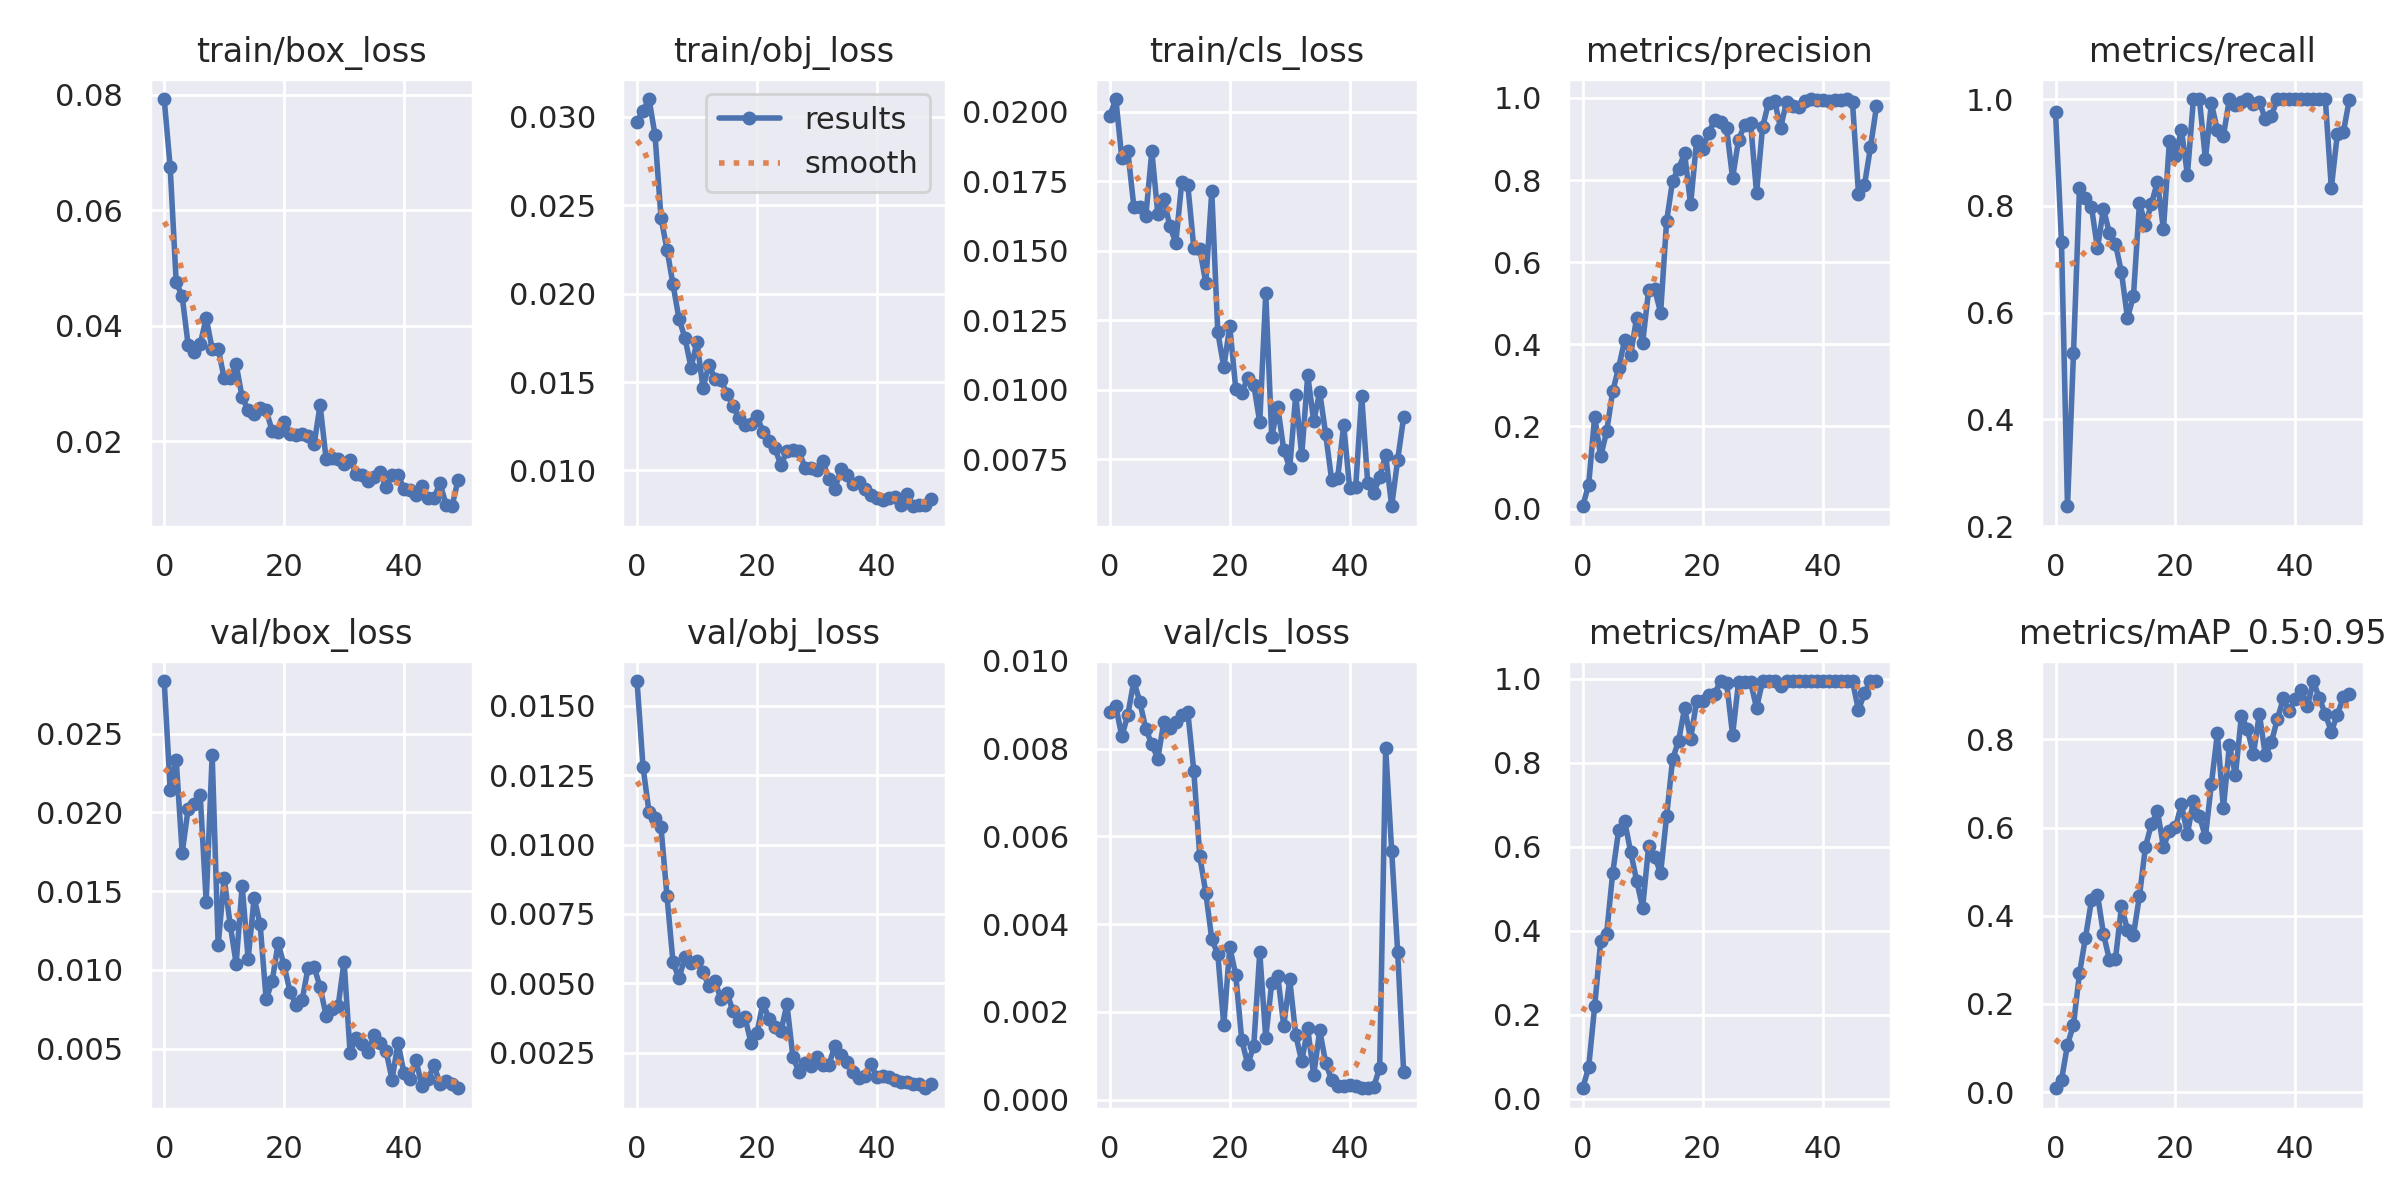


2️⃣ Confusion Matrix:


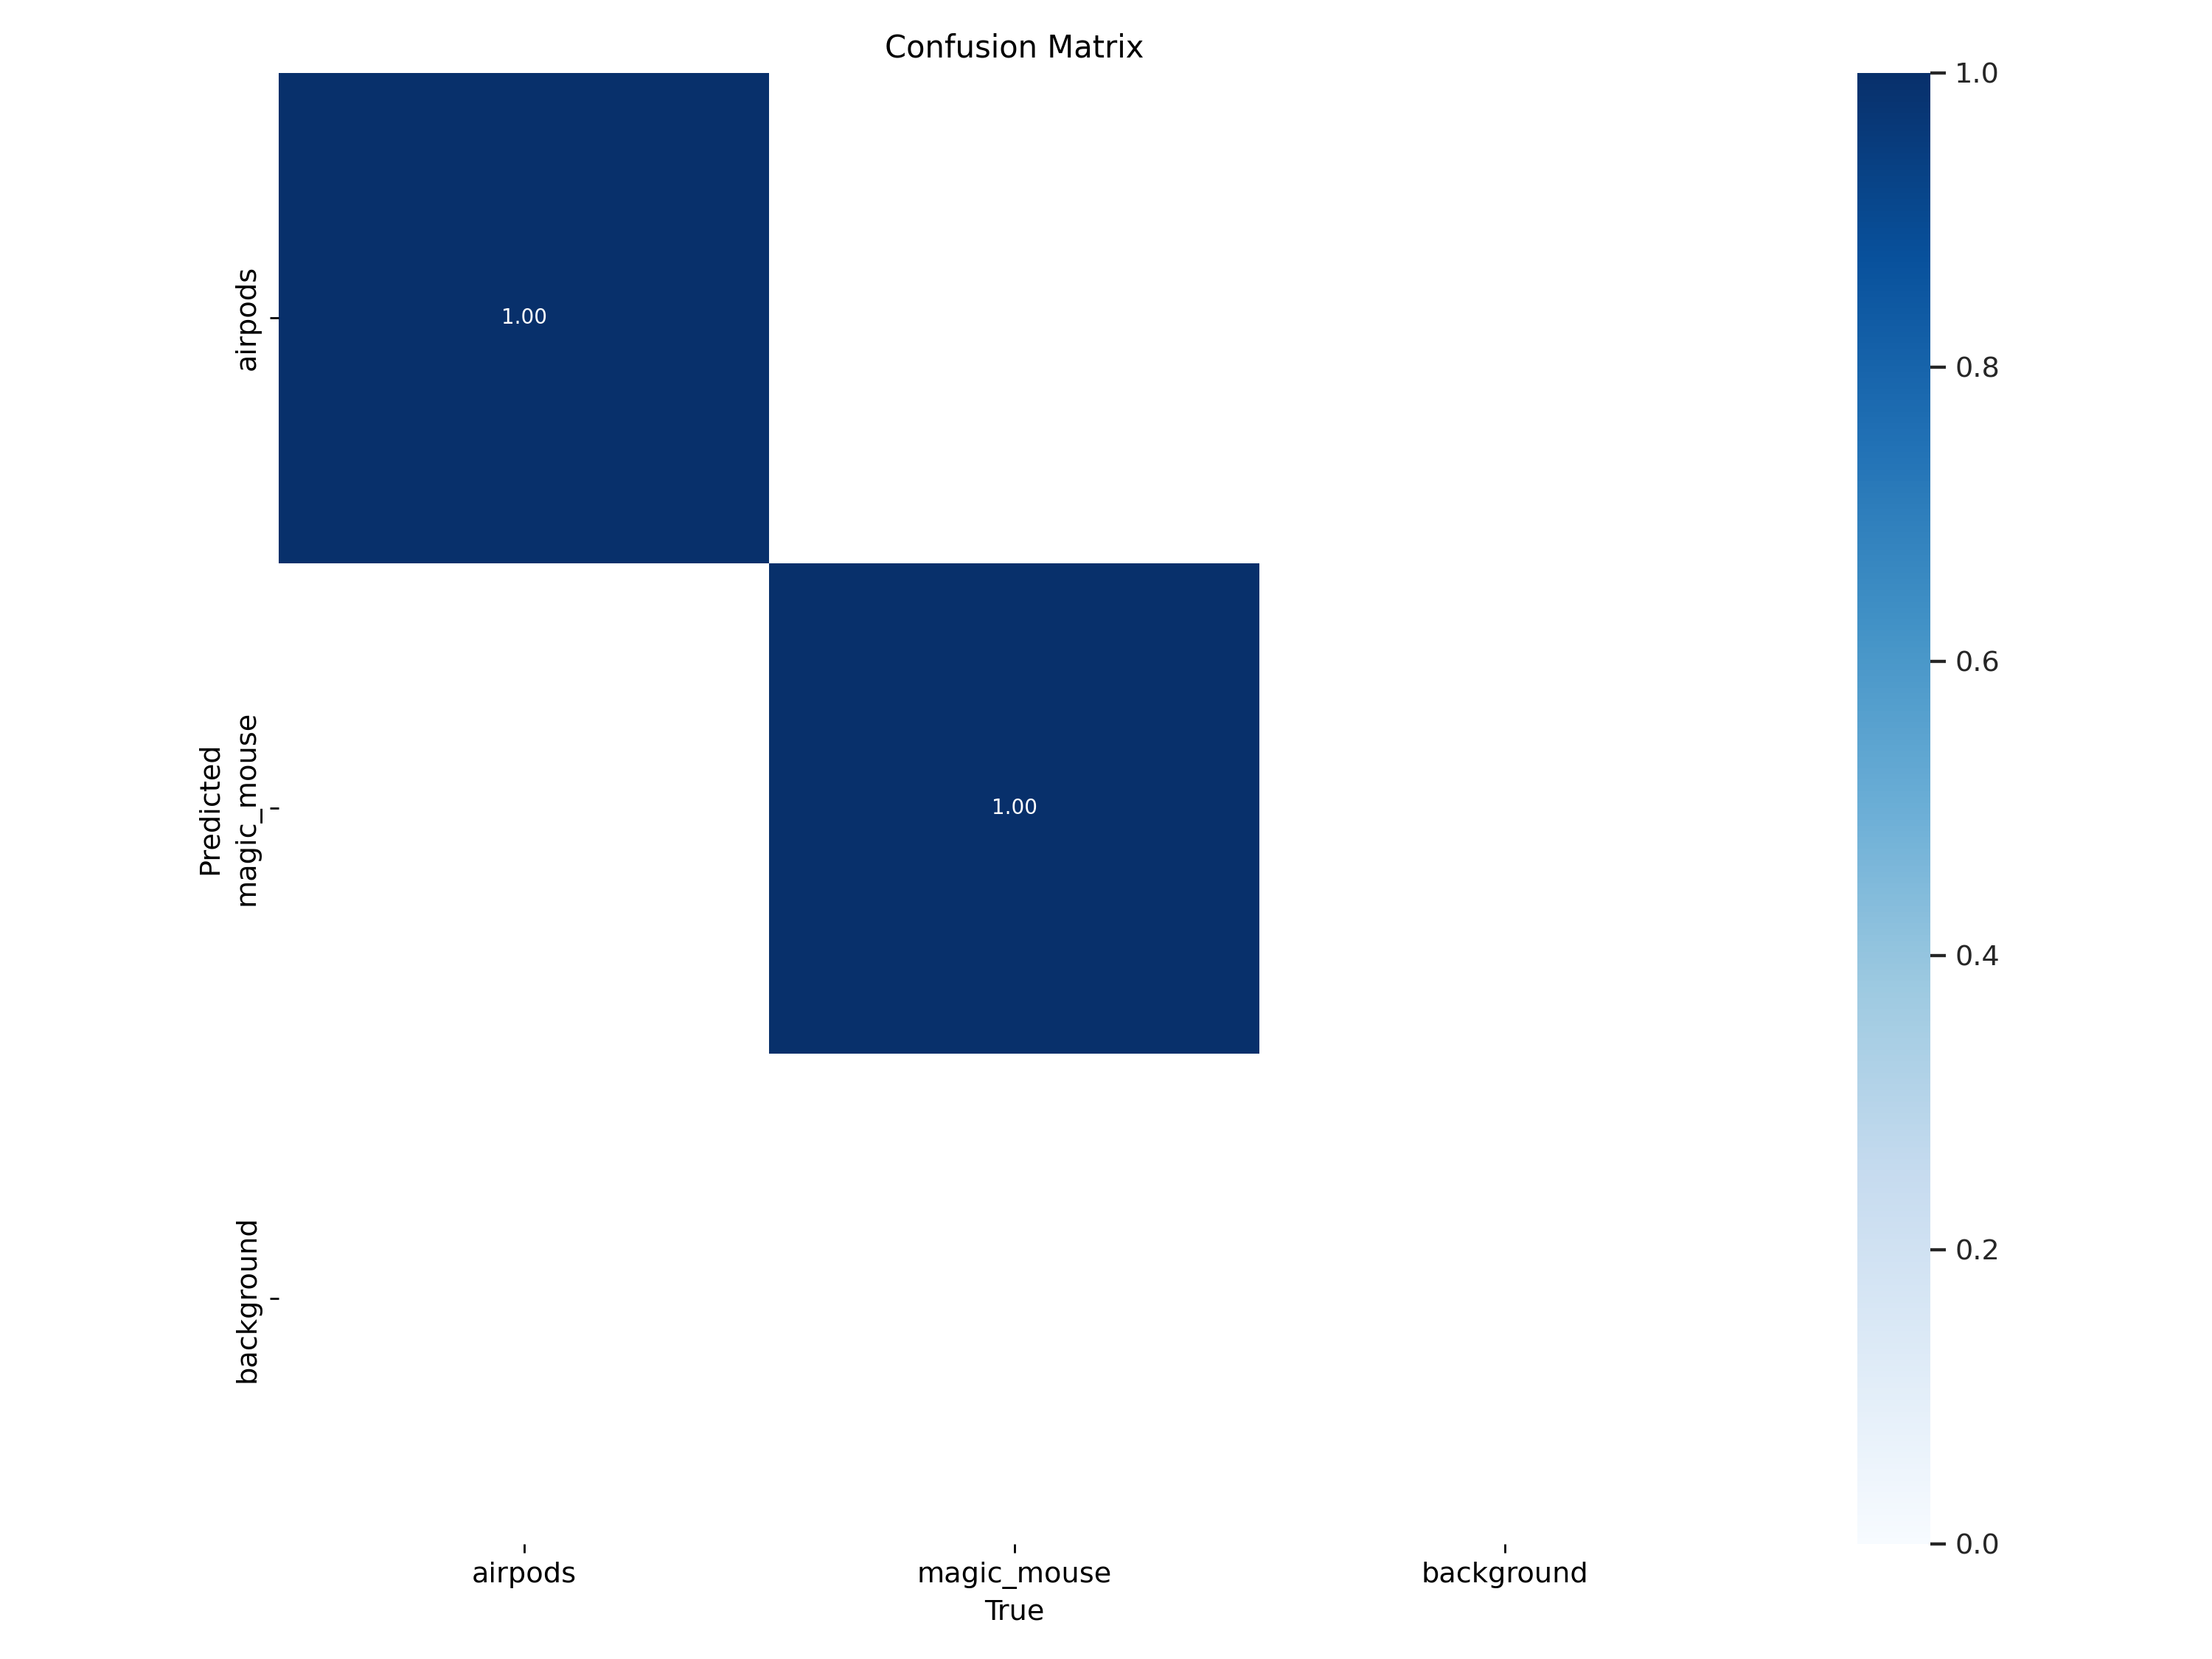


3️⃣ Precision-Recall Curve:


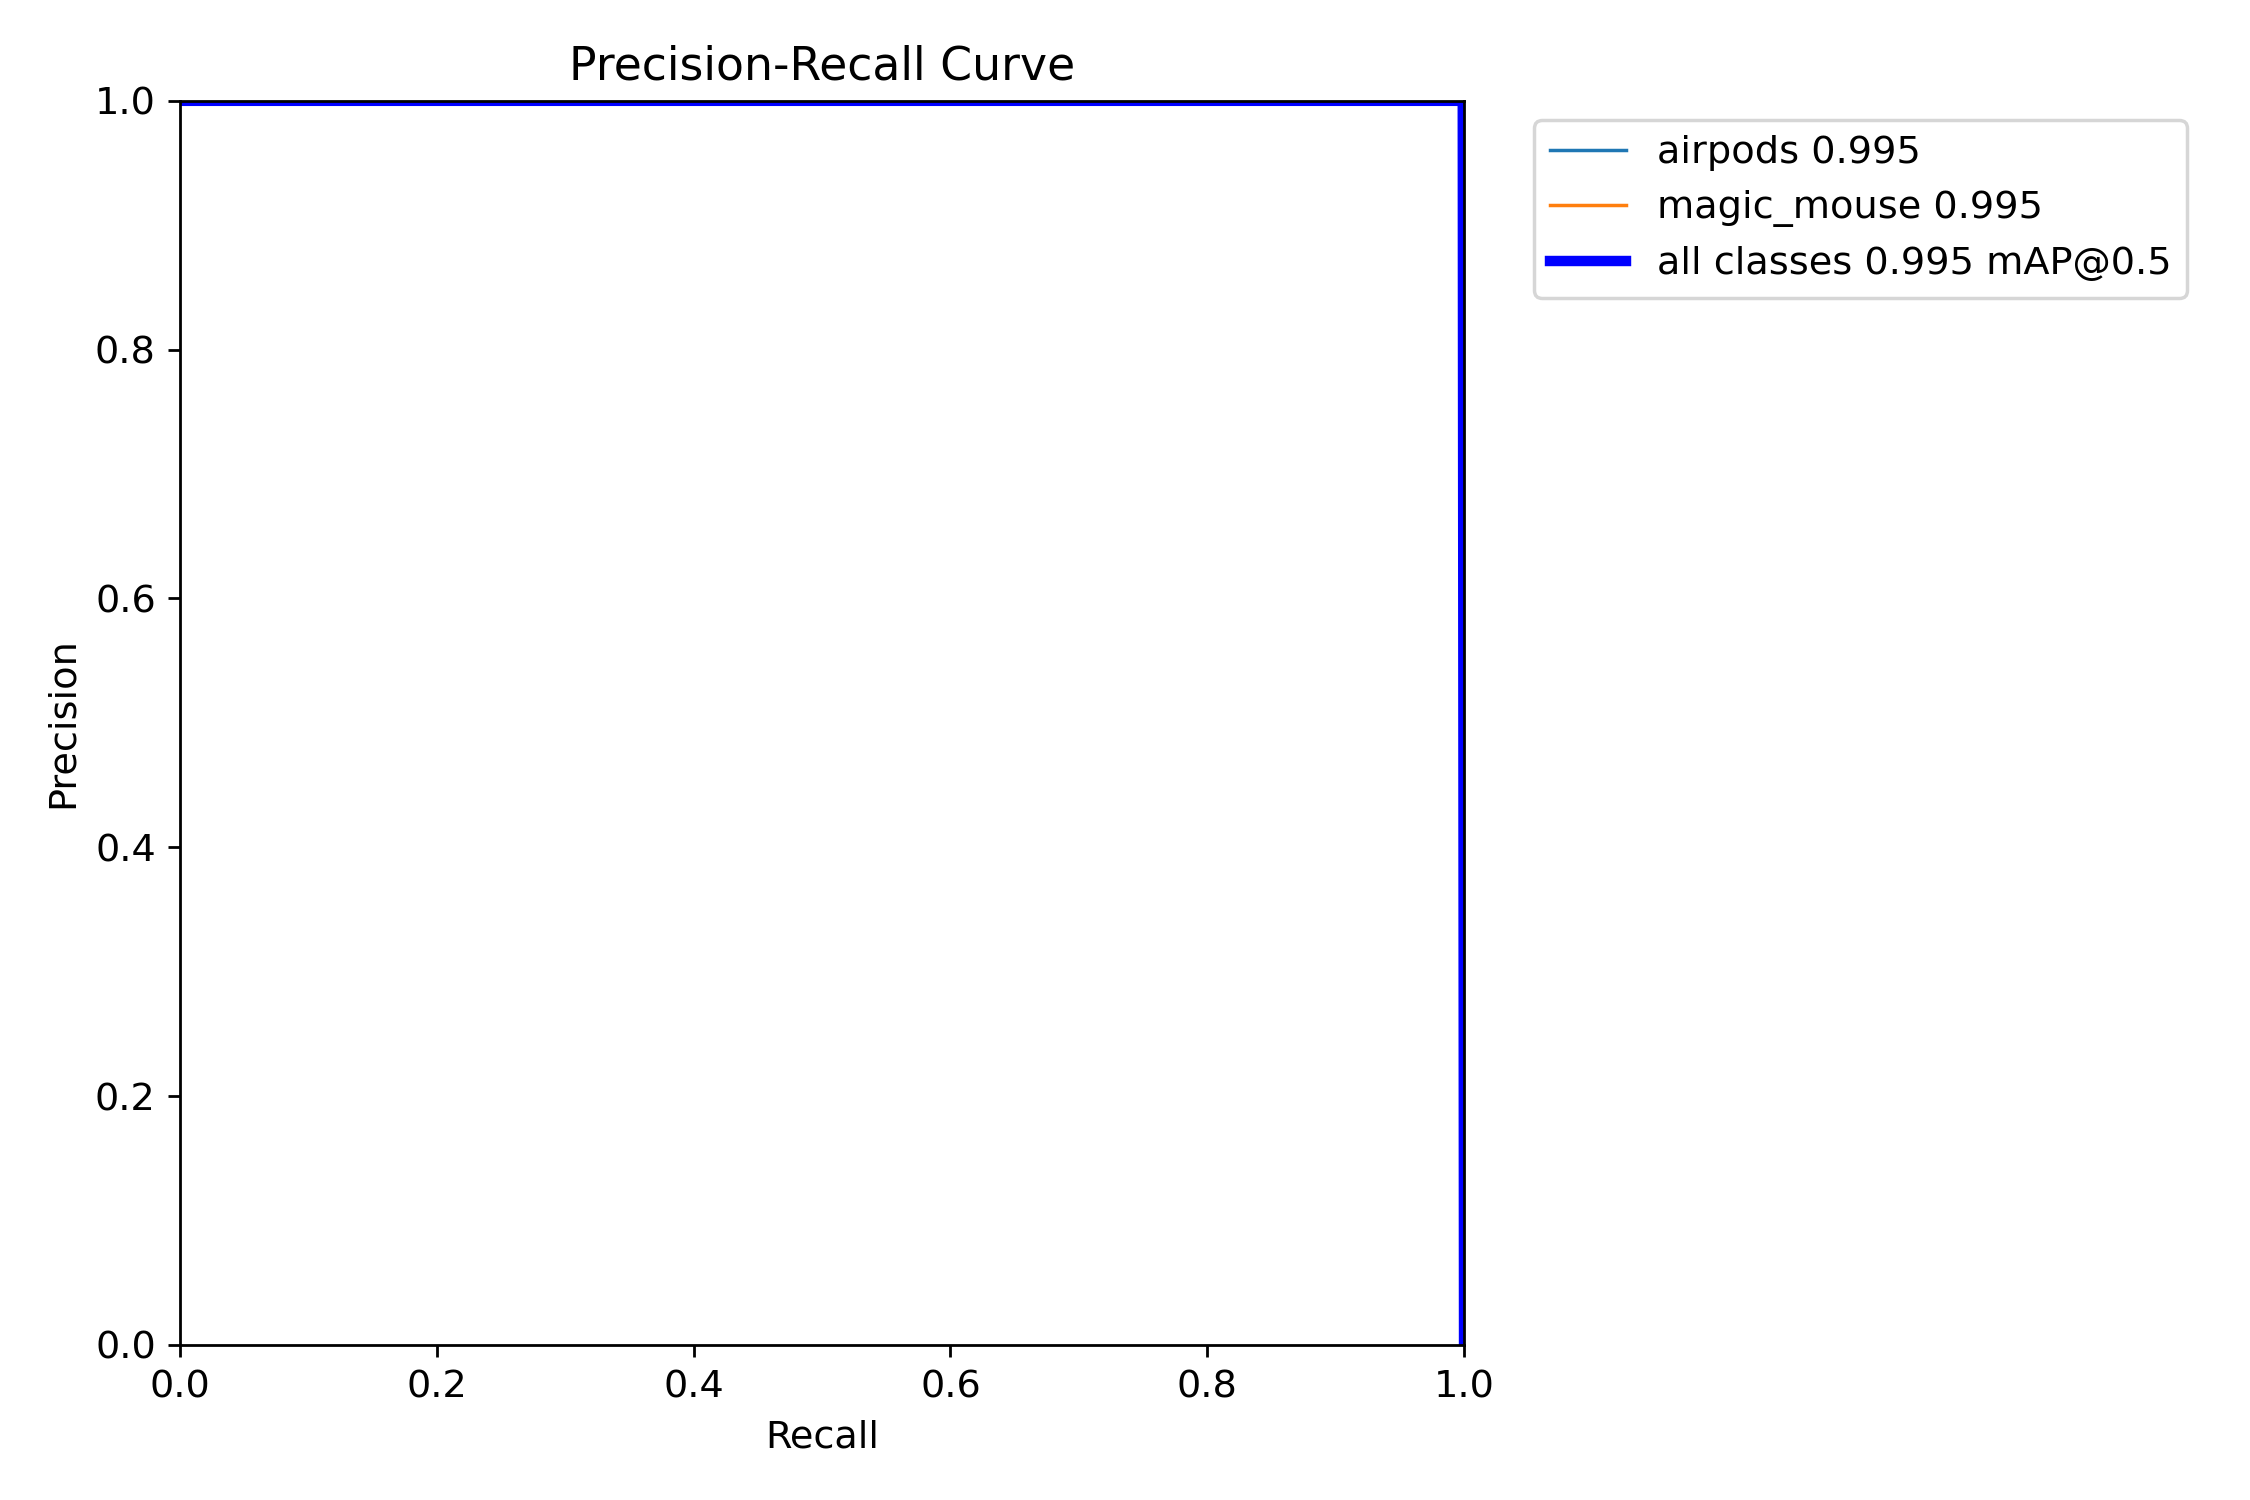


4️⃣ F1 Score Curve:


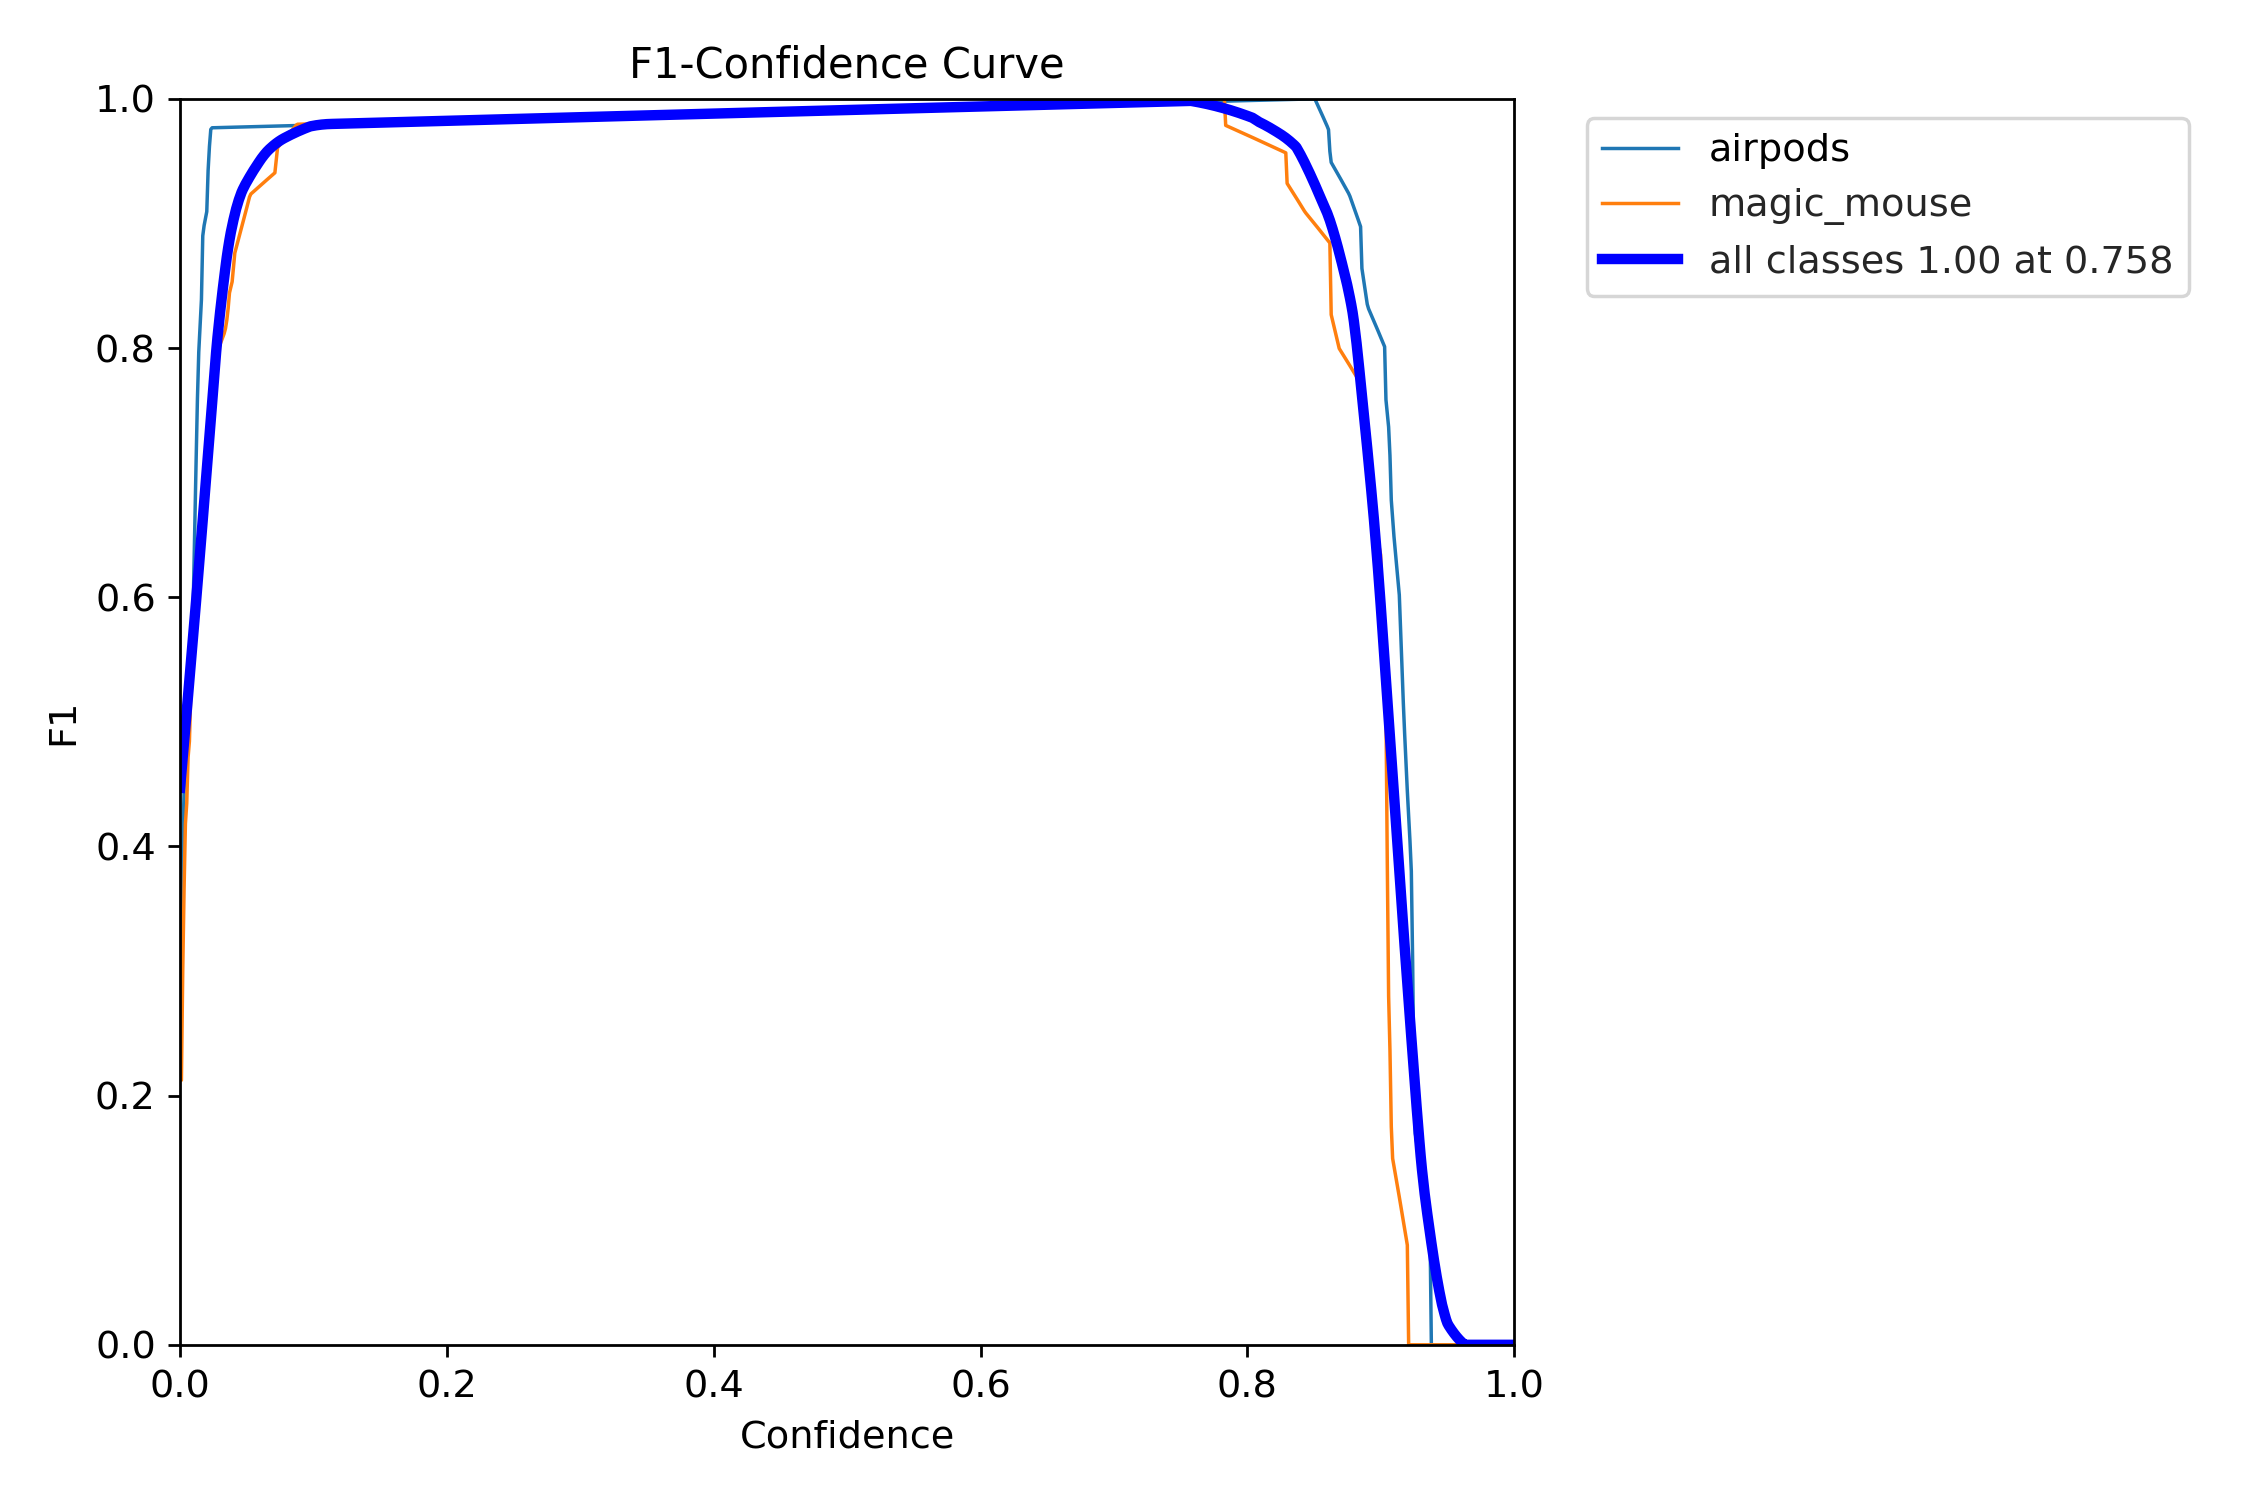

In [15]:
# Eğitim sonuçlarını görselleştir
from IPython.display import Image, display
import os

# Sonuç klasörü
results_dir = 'runs/train/yolov5_airpods_mouse3'

print("📊 EĞİTİM SONUÇLARI\n" + "="*50)

# 1. Results.png - Loss ve metrik grafikleri
if os.path.exists(f'{results_dir}/results.png'):
    print("\n1️⃣ Loss ve Metrik Grafikleri:")
    display(Image(filename=f'{results_dir}/results.png', width=800))

# 2. Confusion Matrix
if os.path.exists(f'{results_dir}/confusion_matrix.png'):
    print("\n2️⃣ Confusion Matrix:")
    display(Image(filename=f'{results_dir}/confusion_matrix.png', width=600))

# 3. PR Curve
if os.path.exists(f'{results_dir}/PR_curve.png'):
    print("\n3️⃣ Precision-Recall Curve:")
    display(Image(filename=f'{results_dir}/PR_curve.png', width=600))

# 4. F1 Curve
if os.path.exists(f'{results_dir}/F1_curve.png'):
    print("\n4️⃣ F1 Score Curve:")
    display(Image(filename=f'{results_dir}/F1_curve.png', width=600))

---

## 8️⃣ Performans Metriklerini Okuma

**Ne Yapıyor:** Eğitim sonuçlarından performans metriklerini çıkarır ve gösterir.

**Beklenen Çıktı:** mAP50, mAP50-95, Precision, Recall değerleri

In [16]:
# Performans metriklerini oku
import pandas as pd

# results.csv dosyasını oku
results_csv = f'{results_dir}/results.csv'

if os.path.exists(results_csv):
    df = pd.read_csv(results_csv)
    df.columns = df.columns.str.strip()  # Boşlukları temizle

    # Son epoch'un değerlerini al
    last_epoch = df.iloc[-1]

    print("📊 YOLOv5 MODEL PERFORMANSI\n" + "="*50)
    print(f"\n🎯 En İyi Sonuçlar (Epoch {int(last_epoch['epoch'])}):\n")

    # Metrikleri yazdır
    metrics = {
        'mAP50': 'metrics/mAP_0.5',
        'mAP50-95': 'metrics/mAP_0.5:0.95',
        'Precision': 'metrics/precision',
        'Recall': 'metrics/recall'
    }

    yolov5_results = {}
    for name, col in metrics.items():
        if col in df.columns:
            value = last_epoch[col]
            yolov5_results[name] = value
            print(f"   {name:12s}: {value:.4f}")

    # Model boyutunu kontrol et
    best_pt = f'{results_dir}/weights/best.pt'
    if os.path.exists(best_pt):
        size_mb = os.path.getsize(best_pt) / (1024 * 1024)
        yolov5_results['Model Boyutu (MB)'] = size_mb
        print(f"   Model Boyutu : {size_mb:.2f} MB")

    # YOLOv8 ile karşılaştırma
    print("\n" + "="*50)
    print("📊 YOLOv8 vs YOLOv5 KARŞILAŞTIRMASI\n")

    yolov8_results = {
        'mAP50': 0.659,
        'mAP50-95': 0.632,
        'Precision': 0.597,
        'Recall': 0.957,
        'Model Boyutu (MB)': 6.2
    }

    comparison = pd.DataFrame({
        'YOLOv8n': yolov8_results,
        'YOLOv5s': yolov5_results
    })

    print(comparison)

    # Farkları hesapla
    print("\n📈 FARKLAR (YOLOv8 - YOLOv5):\n")
    for metric in ['mAP50', 'mAP50-95', 'Precision', 'Recall']:
        diff = yolov8_results[metric] - yolov5_results[metric]
        symbol = "📈" if diff > 0 else "📉"
        print(f"   {symbol} {metric:12s}: {diff:+.4f}")

else:
    print("❌ results.csv dosyası bulunamadı!")

📊 YOLOv5 MODEL PERFORMANSI

🎯 En İyi Sonuçlar (Epoch 49):

   mAP50       : 0.9950
   mAP50-95    : 0.9029
   Precision   : 0.9791
   Recall      : 0.9988
   Model Boyutu : 13.73 MB

📊 YOLOv8 vs YOLOv5 KARŞILAŞTIRMASI

                   YOLOv8n   YOLOv5s
mAP50                0.659   0.99500
mAP50-95             0.632   0.90286
Precision            0.597   0.97909
Recall               0.957   0.99876
Model Boyutu (MB)    6.200  13.72795

📈 FARKLAR (YOLOv8 - YOLOv5):

   📉 mAP50       : -0.3360
   📉 mAP50-95    : -0.2709
   📉 Precision   : -0.3821
   📉 Recall      : -0.0418


---

## 9️⃣ Sonuçları Google Drive'a Kaydetme

**Ne Yapıyor:** Eğitilmiş modeli ve sonuç grafiklerini Google Drive'ınıza kaydeder.

**Kaydedilen Dosyalar:**
- `yolov5_best.pt` - Eğitilmiş model
- `yolov5_results.png` - Performans grafikleri
- `yolov5_confusion_matrix.png` - Confusion matrix

**Beklenen Çıktı:** "Dosyalar kaydedildi" mesajı

In [17]:
# Sonuçları Google Drive'a kaydet
import shutil

# Hedef klasör
drive_folder = '/content/drive/MyDrive/Uyg2 2'

print("💾 Sonuçlar Google Drive'a kaydediliyor...\n")

# 1. Best model
source = f'{results_dir}/weights/best.pt'
dest = f'{drive_folder}/yolov5_best.pt'
if os.path.exists(source):
    shutil.copy(source, dest)
    print(f"✅ Model kaydedildi: yolov5_best.pt ({os.path.getsize(dest)/(1024*1024):.2f} MB)")

# 2. Results.png
source = f'{results_dir}/results.png'
dest = f'{drive_folder}/yolov5_results.png'
if os.path.exists(source):
    shutil.copy(source, dest)
    print(f"✅ Grafik kaydedildi: yolov5_results.png")

# 3. Confusion Matrix
source = f'{results_dir}/confusion_matrix.png'
dest = f'{drive_folder}/yolov5_confusion_matrix.png'
if os.path.exists(source):
    shutil.copy(source, dest)
    print(f"✅ Confusion matrix kaydedildi: yolov5_confusion_matrix.png")

# 4. PR Curve
source = f'{results_dir}/PR_curve.png'
dest = f'{drive_folder}/yolov5_PR_curve.png'
if os.path.exists(source):
    shutil.copy(source, dest)
    print(f"✅ PR Curve kaydedildi: yolov5_PR_curve.png")

print("\n🎉 Tüm dosyalar Google Drive'a kaydedildi!")
print(f"📂 Konum: {drive_folder}")

💾 Sonuçlar Google Drive'a kaydediliyor...

✅ Model kaydedildi: yolov5_best.pt (13.73 MB)
✅ Grafik kaydedildi: yolov5_results.png
✅ Confusion matrix kaydedildi: yolov5_confusion_matrix.png
✅ PR Curve kaydedildi: yolov5_PR_curve.png

🎉 Tüm dosyalar Google Drive'a kaydedildi!
📂 Konum: /content/drive/MyDrive/Uyg2 2


---

## 🔟 Test Görseli ile Deneme (Opsiyonel)

**Ne Yapıyor:** Eğitilmiş YOLOv5 modelini bir test görseli üzerinde dener.

**Beklenen Çıktı:** Tespit edilmiş nesneler ile görsel

In [21]:
import glob
import os

# En son eğitilen modelin yolunu bul
all_runs = glob.glob('/content/yolov5/runs/train/*')
latest_run = max(all_runs, key=os.path.getmtime)
best_weights = f"{latest_run}/weights/best.pt"

print(f"✅ Kullanılacak model: {best_weights}")

✅ Kullanılacak model: /content/yolov5/runs/train/yolov5_airpods_mouse3/weights/best.pt


In [29]:
# Rastgele bir test görseli seç
import random
val_images = glob.glob('/content/yolov5/yolo_dataset/val/images/*.JPG')
test_img = random.choice(val_images)
print(f"🖼️ Test görseli: {os.path.basename(test_img)}")

# Modeli test et (Değişkeni kullanıyoruz!)
!python detect.py --weights "{best_weights}" --img 640 --conf 0.25 --source "{test_img}" --name test_result

# En son oluşturulan detect klasörünü bul
all_detect_runs = glob.glob('runs/detect/*')
latest_detect = max(all_detect_runs, key=os.path.getmtime)

# Sonucu göster
from IPython.display import Image
display(Image(filename=f'{latest_detect}/{os.path.basename(test_img)}'))

Output hidden; open in https://colab.research.google.com to view.

---

## ✅ TAMAMLANDI!

### 🎉 Başarıyla Tamamladığınız Adımlar:

1. ✅ YOLOv5 kurulumu yapıldı
2. ✅ Veri seti hazırlandı
3. ✅ Model eğitildi (50 epoch)
4. ✅ Performans metrikleri elde edildi
5. ✅ YOLOv8 ile karşılaştırma yapıldı
6. ✅ Sonuçlar Google Drive'a kaydedildi
